In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import dtale

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
filename = r"C:\Users\mmm19\OneDrive\Desktop\Bootcamp\Usecase-7\data\final_data.csv"
df = pd.read_csv(filename)

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [4]:
df["name"].value_counts()

name
Paulinho              6
Vitinho               5
Guilherme             5
Fernando              4
João Pedro            4
                     ..
Everson               1
Matheus Mendes        1
Gabriel Delfim        1
Nathan Silva          1
Alexander Badolato    1
Name: count, Length: 10584, dtype: int64

In [5]:
df["winger"].unique()

array([0, 1], dtype=int64)

In [6]:
df.drop(columns=["name", "player", "position_encoded", "winger", "team"], inplace=True)

In [7]:
df.head()

,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
2,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000
3,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000
4,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000


In [8]:
df.shape

(10754, 17)

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [9]:
# Licensed in kaggle

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [10]:
# in 2 season 2021-2022 and 2022-2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [11]:
# Consistent

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [12]:
# the data is relevant

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [13]:
df.duplicated().sum()

8

In [14]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [15]:
df.isnull().sum()

position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

In [16]:
# check columns types
df.dtypes

position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
dtype: object

In [17]:
df.columns

Index(['position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value'],
      dtype='object')

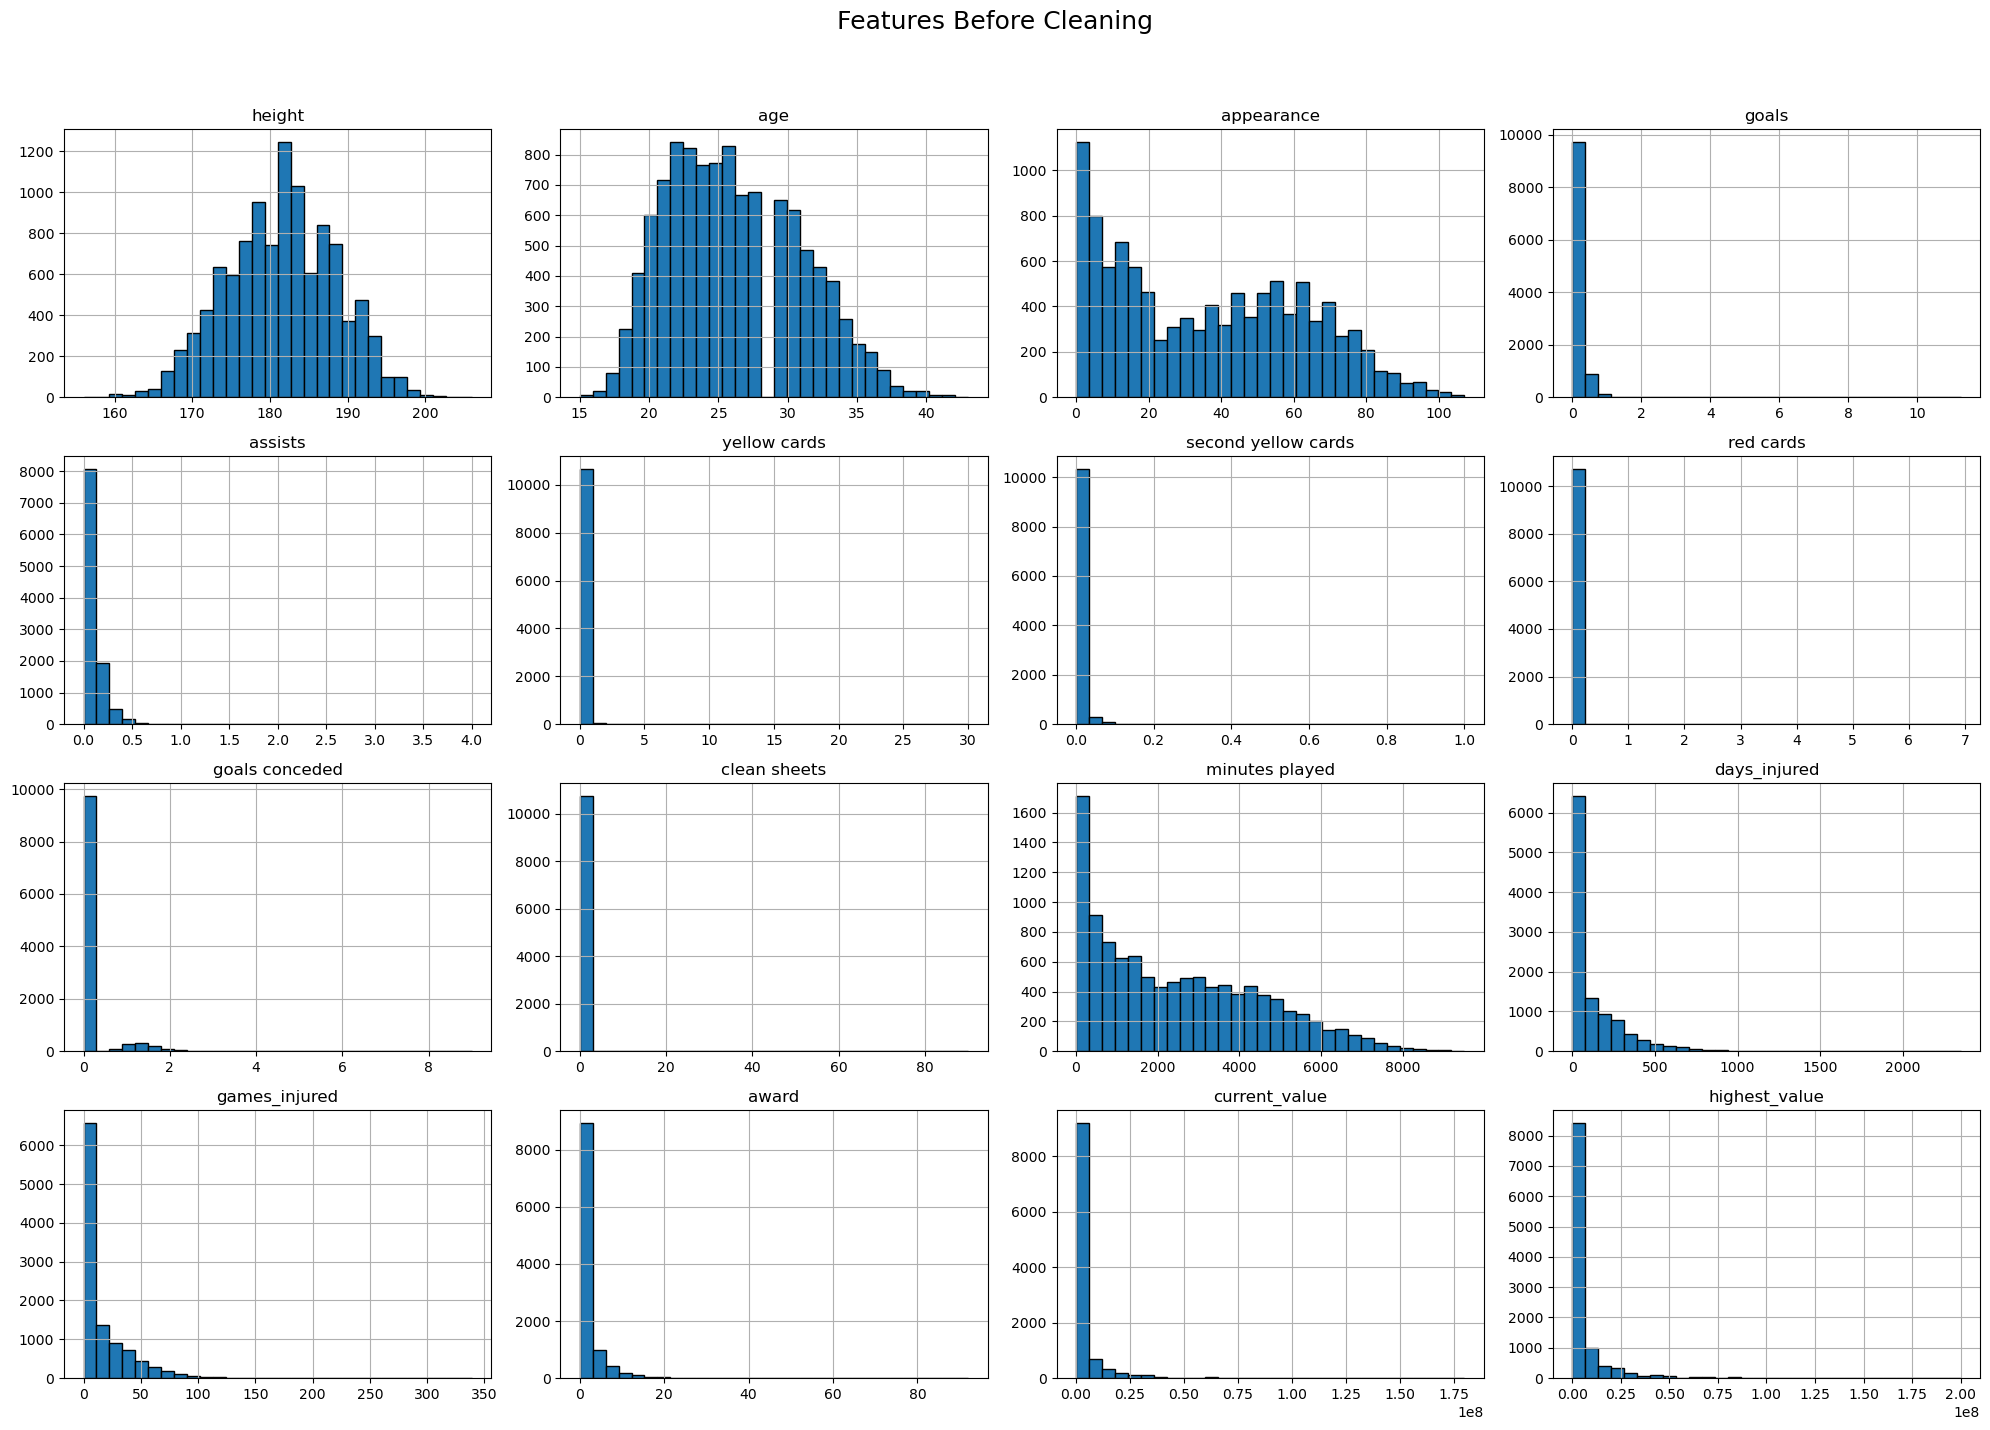

In [18]:
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Features Before Cleaning", fontsize=18)  # Add title with fontsize
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()

In [19]:
df = df[df["goals"] <=0.75]

(array([6254., 1530.,  812.,  605.,  520.,  355.,  215.,  172.,   93.,
          52.]),
 array([0.   , 0.075, 0.15 , 0.225, 0.3  , 0.375, 0.45 , 0.525, 0.6  ,
        0.675, 0.75 ]),
 <BarContainer object of 10 artists>)

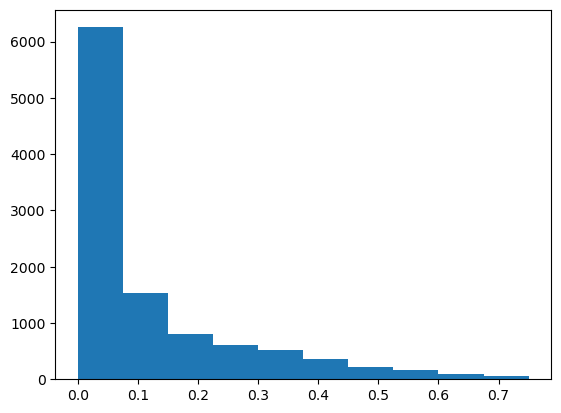

In [20]:
plt.hist(df["goals"])

In [21]:
df = df[df["assists"] <= 0.30]

(array([4944., 1012.,  896.,  803.,  720.,  525.,  428.,  320.,  262.,
         161.]),
 array([0.        , 0.02998751, 0.05997501, 0.08996252, 0.11995002,
        0.14993753, 0.17992503, 0.20991254, 0.23990004, 0.26988755,
        0.29987505]),
 <BarContainer object of 10 artists>)

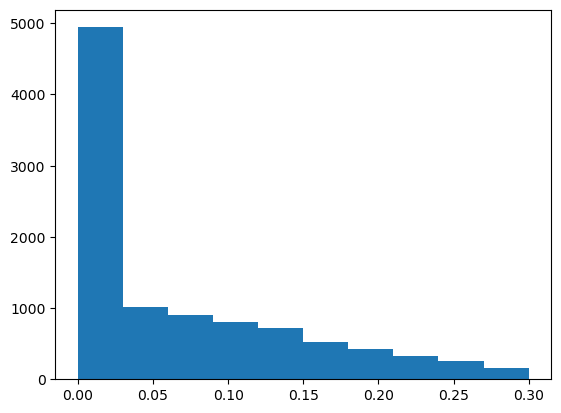

In [22]:
plt.hist(df["assists"])

In [23]:
df = df[df["yellow cards"] <= 0.5]

(array([2423., 1111., 1452., 1440., 1161.,  822.,  595.,  352.,  209.,
         139.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <BarContainer object of 10 artists>)

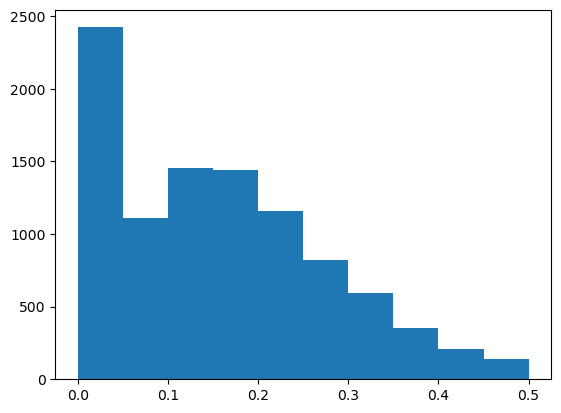

In [24]:
plt.hist(df["yellow cards"])

In [25]:
df= df[df["second yellow cards"] <= 0.1]

(array([8618.,  347.,  290.,  158.,   84.,   53.,   35.,   28.,   21.,
          16.]),
 array([0.        , 0.00995575, 0.0199115 , 0.02986726, 0.03982301,
        0.04977876, 0.05973451, 0.06969027, 0.07964602, 0.08960177,
        0.09955752]),
 <BarContainer object of 10 artists>)

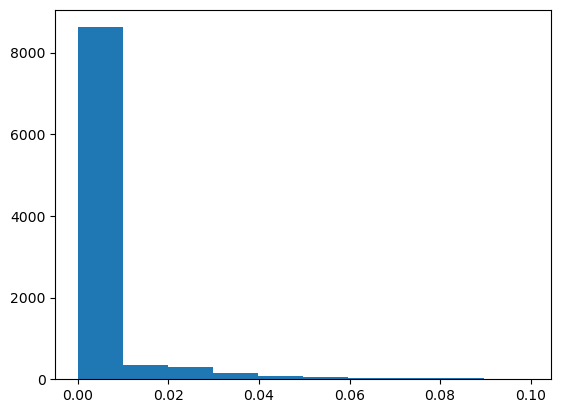

In [26]:
plt.hist(df["second yellow cards"])

In [27]:
df = df[df["red cards"] <= 0.1]

(array([8390.,  368.,  336.,  187.,  118.,   73.,   41.,   36.,   26.,
          10.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 <BarContainer object of 10 artists>)

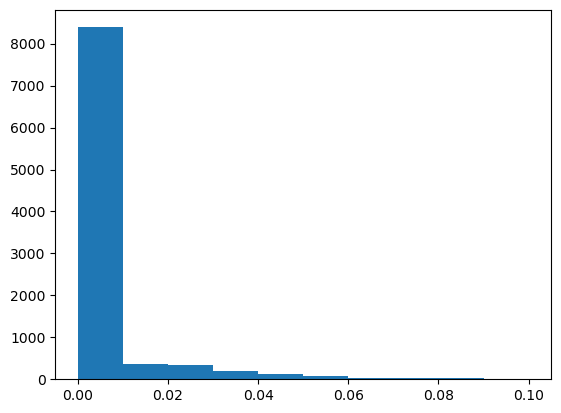

In [28]:
plt.hist(df["red cards"])

In [29]:
df = df[df["goals conceded"] <= 2]

(array([8.583e+03, 2.000e+00, 1.900e+01, 4.400e+01, 1.170e+02, 1.950e+02,
        2.040e+02, 1.680e+02, 9.800e+01, 7.500e+01]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

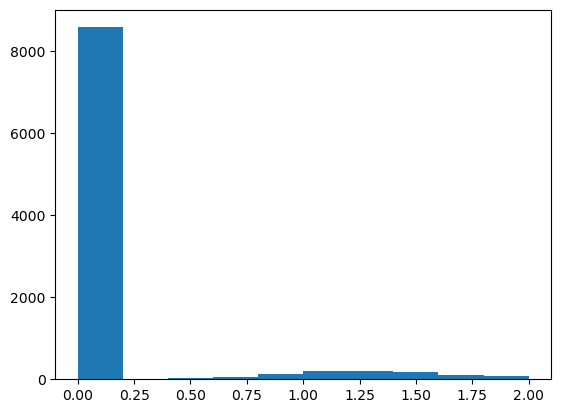

In [30]:
plt.hist(df["goals conceded"])

In [31]:
df = df[df["clean sheets"] < 0.5]

(array([8602.,   12.,   53.,   85.,  119.,  170.,  134.,   95.,   82.,
          45.]),
 array([0.        , 0.04945055, 0.0989011 , 0.14835165, 0.1978022 ,
        0.24725275, 0.2967033 , 0.34615385, 0.3956044 , 0.44505495,
        0.4945055 ]),
 <BarContainer object of 10 artists>)

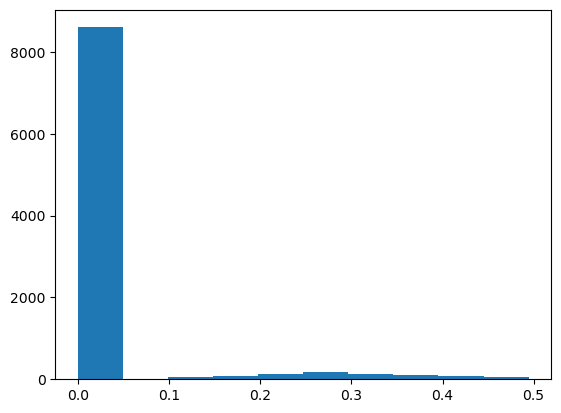

In [32]:
plt.hist(df["clean sheets"])

In [33]:
df = df[df["minutes played"] <= 6000]

(array([1804., 1114., 1019.,  796.,  863.,  788.,  755.,  696.,  545.,
         418.]),
 array([   0.,  600., 1200., 1800., 2400., 3000., 3600., 4200., 4800.,
        5400., 6000.]),
 <BarContainer object of 10 artists>)

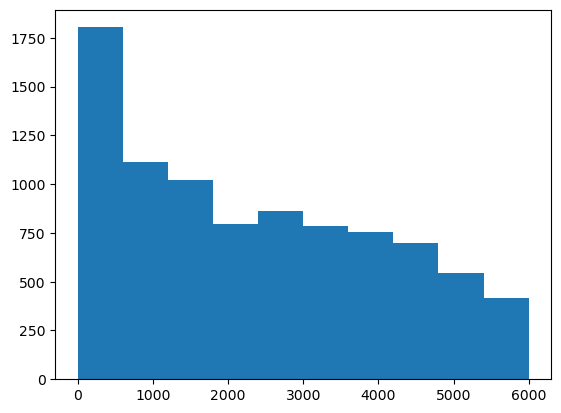

In [34]:
plt.hist(df["minutes played"])

In [35]:
df = df[df["days_injured"] <= 400]

(array([4478.,  803.,  606.,  468.,  398.,  367.,  376.,  255.,  207.,
         180.]),
 array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320., 360., 400.]),
 <BarContainer object of 10 artists>)

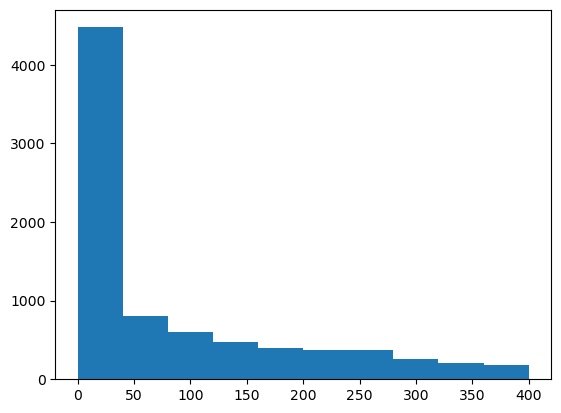

In [36]:
plt.hist(df["days_injured"])

In [37]:
df = df[df["games_injured"] <= 50]

(array([4330.,  807.,  621.,  493.,  377.,  327.,  287.,  279.,  207.,
         189.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

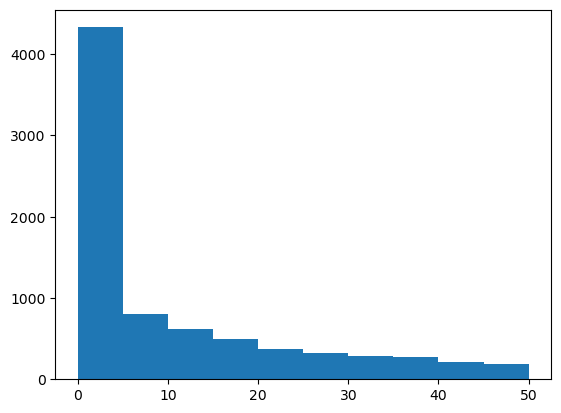

In [38]:
plt.hist(df["games_injured"])

In [39]:
df = df[df["award"] <= 6]

(array([3828., 1687.,    0.,  865.,    0.,  499.,  286.,    0.,  204.,
         141.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

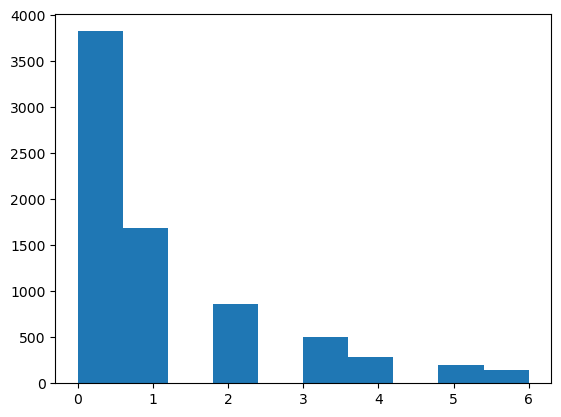

In [40]:
plt.hist(df["award"])

In [41]:
df = df[df["current_value"] <= 5000000]

(array([3056., 1386.,  565.,  456.,  322.,  241.,  229.,  130.,  159.,
         198.]),
 array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000., 4500000., 5000000.]),
 <BarContainer object of 10 artists>)

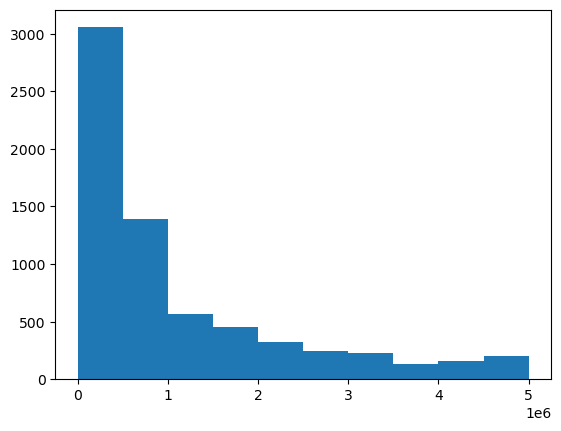

In [42]:
plt.hist(df["current_value"])

In [43]:
df = df[df["highest_value"] <= 5000000]

(array([2314., 1306.,  607.,  466.,  360.,  282.,  262.,  167.,  201.,
         289.]),
 array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000., 4500000., 5000000.]),
 <BarContainer object of 10 artists>)

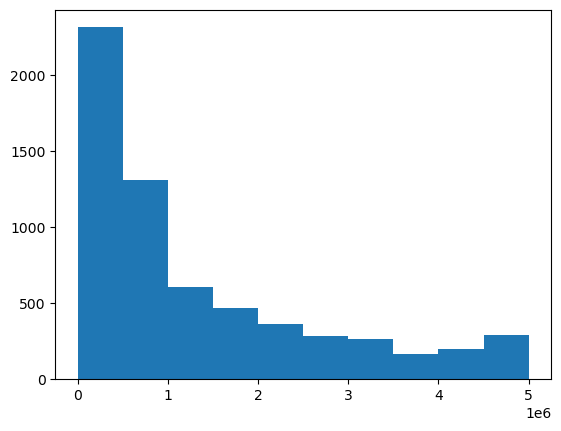

In [44]:
plt.hist(df["highest_value"])

In [45]:
df.shape

(6254, 17)

In [46]:
df.head()

,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
8,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000
20,midfield-CentralMidfield,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,0.000000,0.000000,2788,0,0,1,800000,800000
21,midfield-CentralMidfield,175.0,18.0,51,0.153759,0.102506,0.000000,0.0,0.0,0.000000,0.000000,3512,0,0,1,800000,800000
55,Goalkeeper,191.0,25.0,65,0.000000,0.000000,0.015340,0.0,0.0,1.257883,0.291461,5867,0,0,0,2000000,2000000
56,Goalkeeper,189.0,33.0,31,0.000000,0.000000,0.064516,0.0,0.0,1.483871,0.161290,2790,89,14,0,600000,3500000


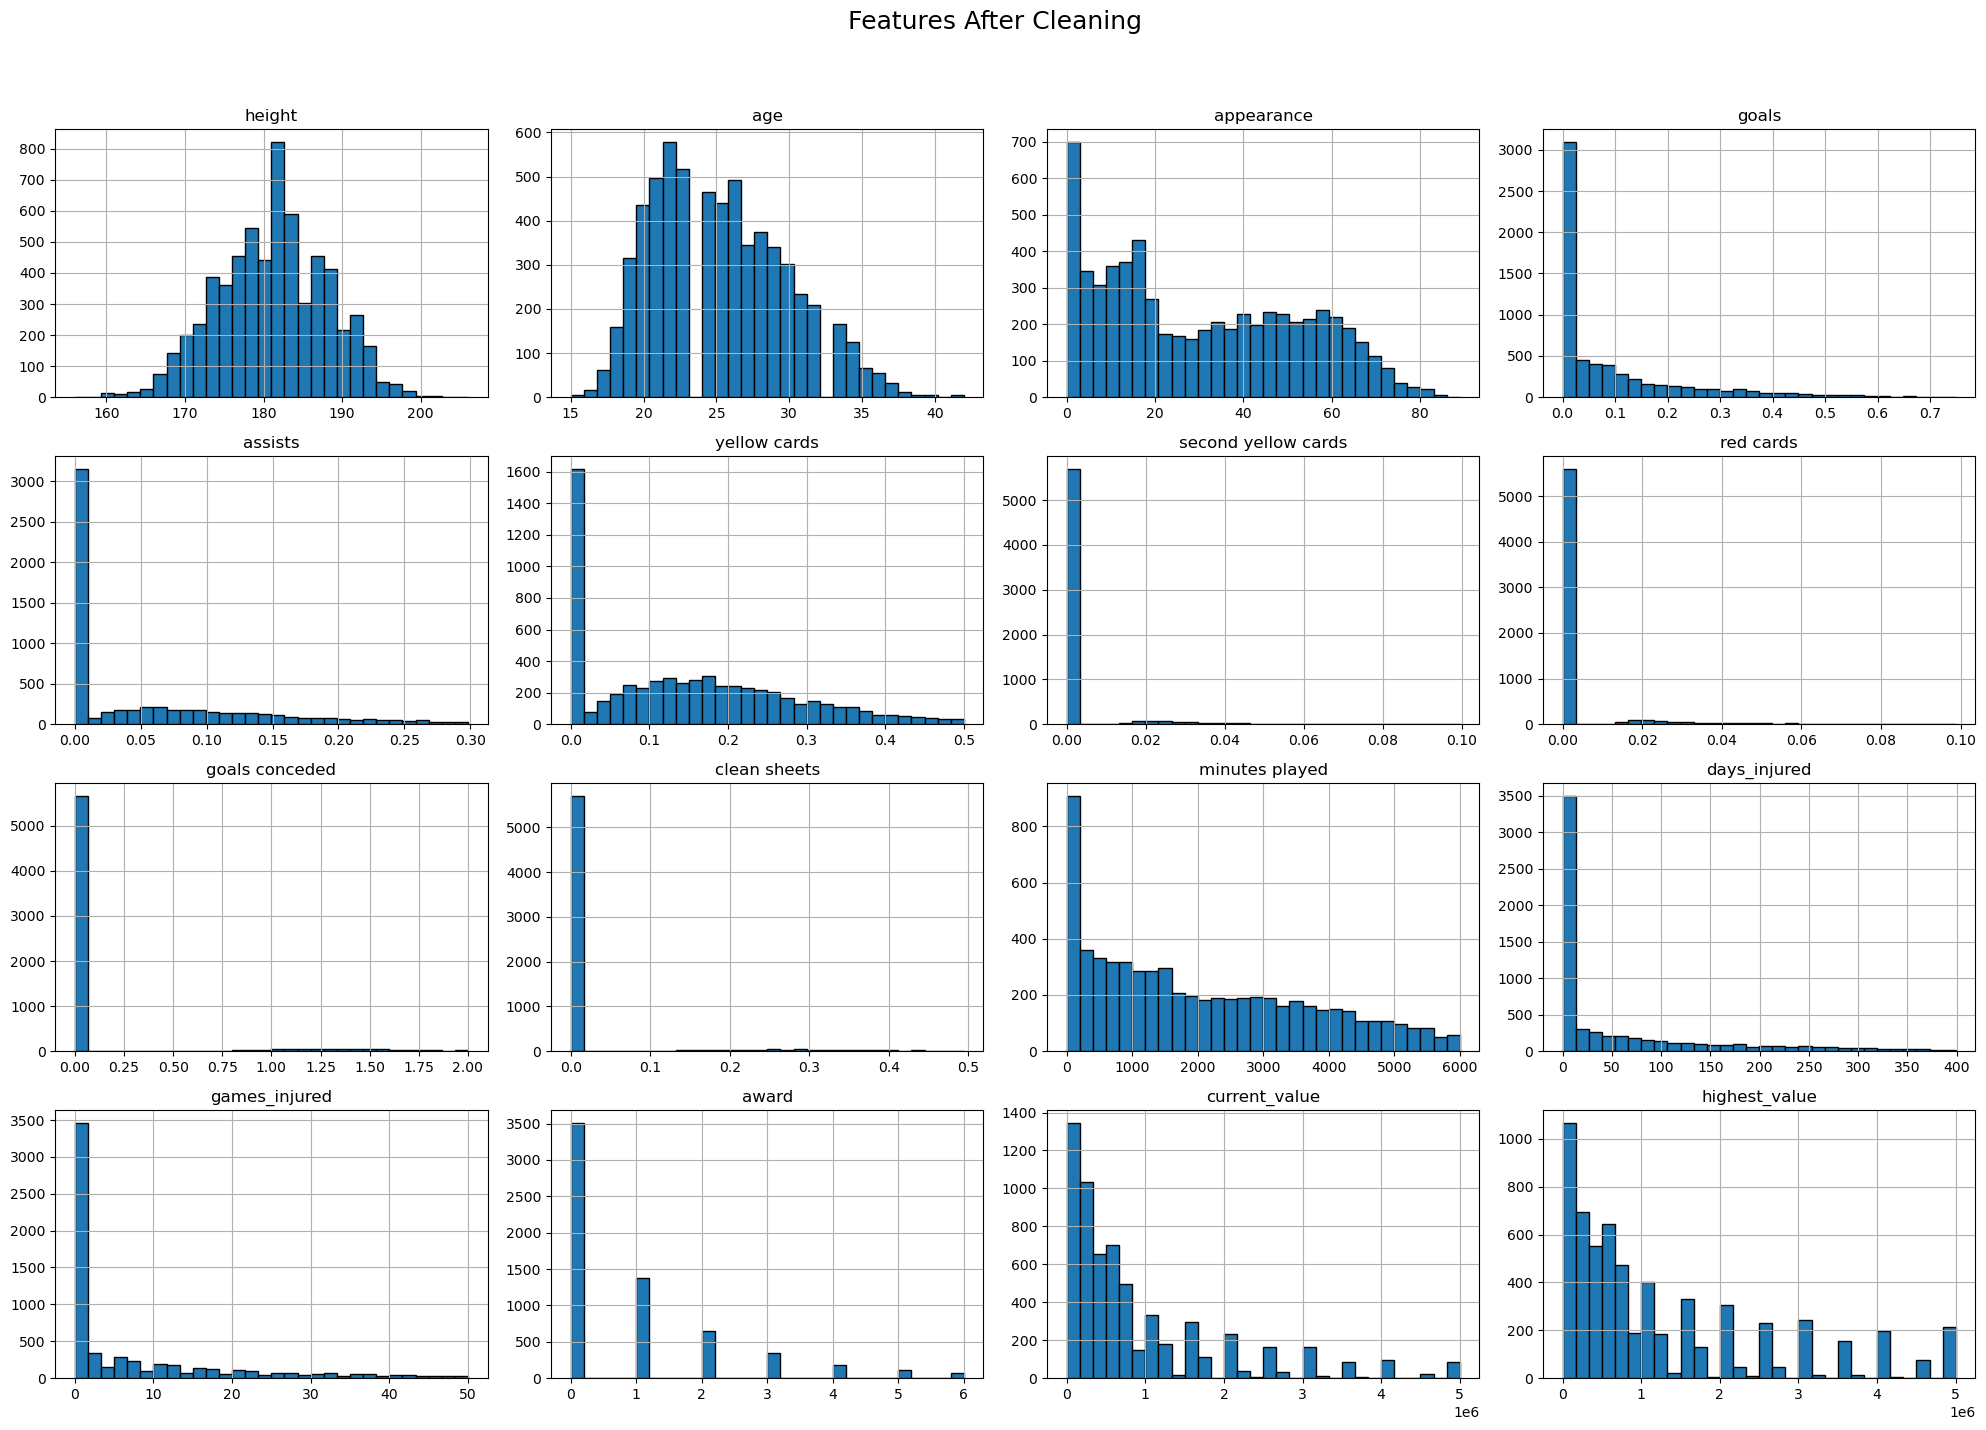

In [47]:
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Features After Cleaning", fontsize=18)  # Add title with fontsize
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()

# position distribution
the distribution of the positions in the data set are near to equal portions, wich leads to good distribution of the position feature.

In [48]:
# Get the least frequent 6 positions
least_frequent_positions = df['position'].value_counts().nsmallest(6).index

# Apply a lambda function to change the last 6 positions to "Other"
df['position'] = df['position'].apply(lambda x: 'Other' if x in least_frequent_positions else x)

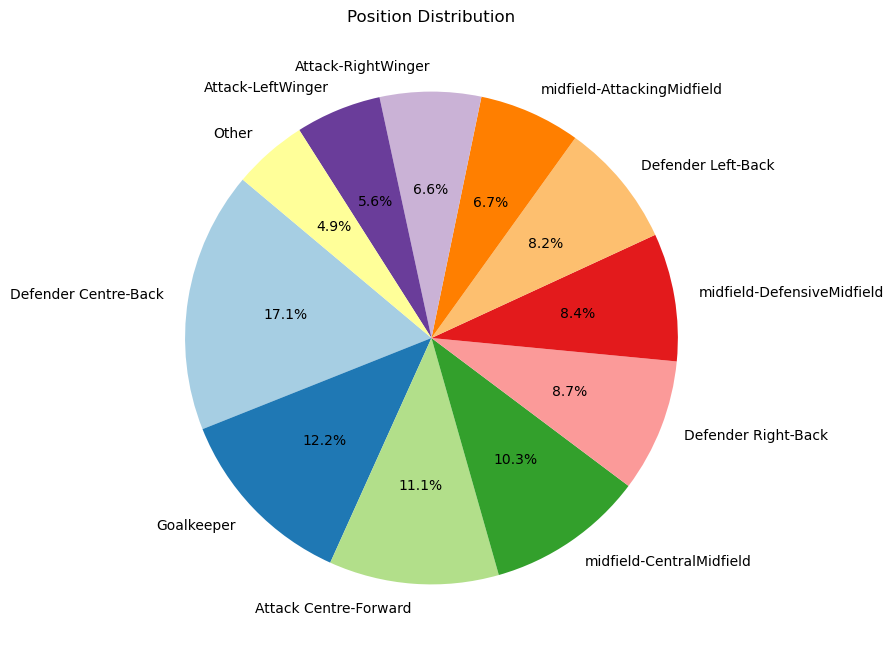

In [49]:
position_counts = df['position'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Adding title
plt.title('Position Distribution')

plt.show()

# players age distribution
from the graph below we notice that some of the player ages are missing, the solution might be to categorize the feature.

(array([  5.,  16.,  61., 160., 316., 435., 496., 578., 518.,   0., 465.,
        439., 492., 344., 374., 340., 302., 234., 208.,   0., 167., 124.,
         67.,  55.,  32.,  11.,   6.,   4.,   0.,   5.]),
 array([15. , 15.9, 16.8, 17.7, 18.6, 19.5, 20.4, 21.3, 22.2, 23.1, 24. ,
        24.9, 25.8, 26.7, 27.6, 28.5, 29.4, 30.3, 31.2, 32.1, 33. , 33.9,
        34.8, 35.7, 36.6, 37.5, 38.4, 39.3, 40.2, 41.1, 42. ]),
 <BarContainer object of 30 artists>)

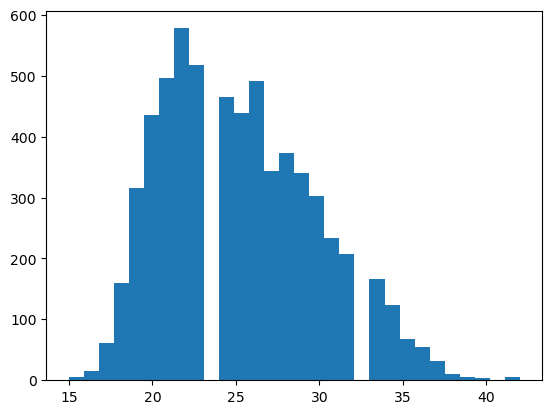

In [50]:
plt.hist(df["age"], bins=30)

In [51]:

# Define bins and labels for age categories
bins = [15, 19, 24, 29, 34, 40]
labels = ['15-19', '20-24', '25-29', '30-34', '35-40']

# Categorize ages into defined bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
df.drop(columns=["age"], inplace=True)
df

,position,height,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,age_group
8,Defender Centre-Back,186.000000,34,0.000000,0.000000,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000,20-24
20,midfield-CentralMidfield,181.000000,39,0.129125,0.064562,0.225968,0.0,0.0,0.000000,0.000000,2788,0,0,1,800000,800000,20-24
21,midfield-CentralMidfield,175.000000,51,0.153759,0.102506,0.000000,0.0,0.0,0.000000,0.000000,3512,0,0,1,800000,800000,15-19
55,Goalkeeper,191.000000,65,0.000000,0.000000,0.015340,0.0,0.0,1.257883,0.291461,5867,0,0,0,2000000,2000000,25-29
56,Goalkeeper,189.000000,31,0.000000,0.000000,0.064516,0.0,0.0,1.483871,0.161290,2790,89,14,0,600000,3500000,30-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,Attack-RightWinger,178.000000,32,0.226700,0.000000,0.283375,0.0,0.0,0.000000,0.000000,1588,0,0,0,200000,200000,20-24
10749,Attack-RightWinger,181.240353,16,0.175953,0.087977,0.263930,0.0,0.0,0.000000,0.000000,1023,0,0,0,75000,75000,20-24
10750,Attack Centre-Forward,190.000000,26,0.372671,0.186335,0.186335,0.0,0.0,0.000000,0.000000,1449,102,18,0,300000,300000,20-24
10751,Attack Centre-Forward,181.240353,20,0.375000,0.000000,0.187500,0.0,0.0,0.000000,0.000000,960,0,0,0,50000,50000,15-19


# correlations
we notice that the most impactful to the current value is the "highest value" column

In [52]:
df_t = pd.get_dummies(df, columns=["position", "age_group"])

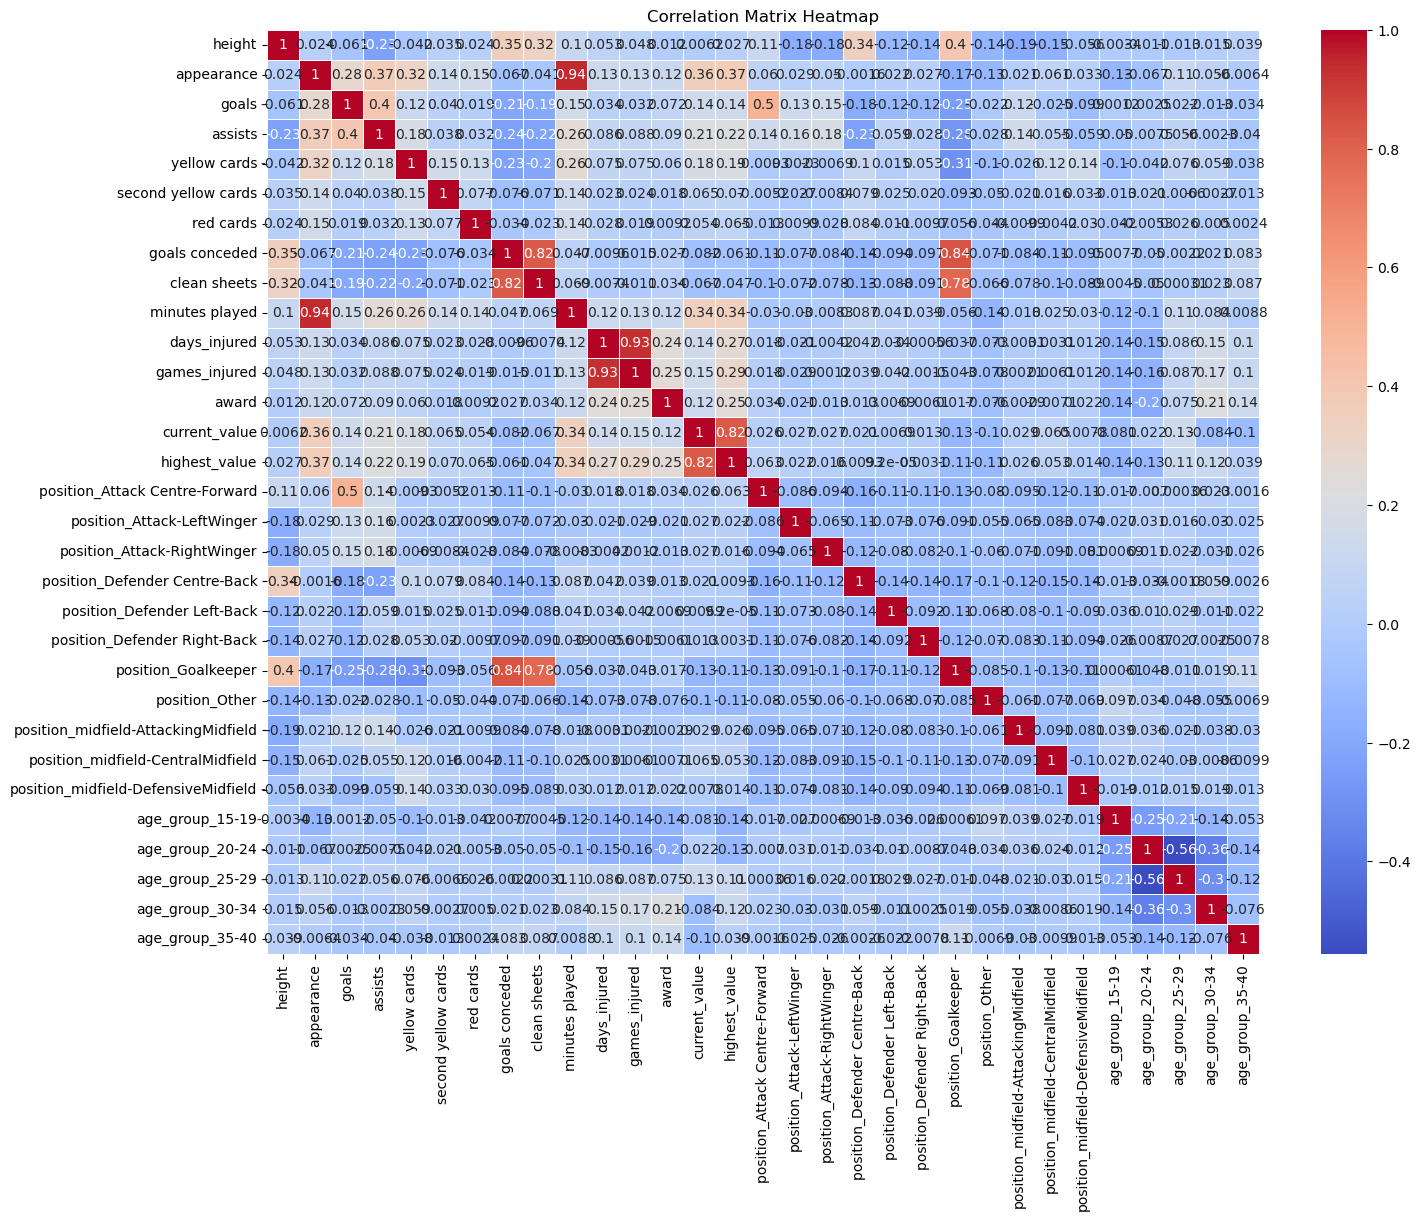

In [53]:
corr_matrix = df_t.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Regression Model Training

In [54]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

In [55]:
df.columns

Index(['position', 'height', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'current_value', 'highest_value', 'age_group'],
      dtype='object')

In [56]:
df.columns

Index(['position', 'height', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'current_value', 'highest_value', 'age_group'],
      dtype='object')

In [57]:
categorical_features = ["position", "age_group"]

In [58]:
df_t = pd.get_dummies(df, columns=categorical_features)

In [59]:
correlation = df_t.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value                          1.000000
highest_value                          0.820517
appearance                             0.355362
minutes played                         0.341114
assists                                0.205632
yellow cards                           0.176975
games_injured                          0.148897
goals                                  0.141369
days_injured                           0.138755
age_group_25-29                        0.132911
award                                  0.123781
position_midfield-CentralMidfield      0.065409
second yellow cards                    0.064780
red cards                              0.053501
position_midfield-AttackingMidfield    0.029257
position_Attack-LeftWinger             0.027117
position_Attack-RightWinger            0.026842
position_Attack Centre-Forward         0.025652
age_group_20-24                        0.021851
position_Defender Centre-Back          0.021185
position_Defender Right-Back           0

In [60]:
threshold = 0.1
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'yellow cards', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value', 'position_Goalkeeper', 'position_Other',
       'age_group_25-29', 'age_group_35-40'],
      dtype='object')

In [61]:
df_t = df_t[selected_features]
df_t

,appearance,goals,assists,yellow cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_Goalkeeper,position_Other,age_group_25-29,age_group_35-40
8,34,0.000000,0.000000,0.130529,2758,47,13,0,2000000,2000000,False,False,False,False
20,39,0.129125,0.064562,0.225968,2788,0,0,1,800000,800000,False,False,False,False
21,51,0.153759,0.102506,0.000000,3512,0,0,1,800000,800000,False,False,False,False
55,65,0.000000,0.000000,0.015340,5867,0,0,0,2000000,2000000,True,False,True,False
56,31,0.000000,0.000000,0.064516,2790,89,14,0,600000,3500000,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,32,0.226700,0.000000,0.283375,1588,0,0,0,200000,200000,False,False,False,False
10749,16,0.175953,0.087977,0.263930,1023,0,0,0,75000,75000,False,False,False,False
10750,26,0.372671,0.186335,0.186335,1449,102,18,0,300000,300000,False,False,False,False
10751,20,0.375000,0.000000,0.187500,960,0,0,0,50000,50000,False,False,False,False


#### Prepare train and test data

In [62]:
# Prepare data
X = df_t.drop(['current_value'], axis=1)
y = df_t['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test_scaled)

In [65]:
y_base = [y_train.mean()] * len(y_test)

In [66]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:.2e}')

Mean Squared Error of base model: 1.24e+12


1. Mean Square Error

In [67]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:.2e}')
print(f'Mean Squared Error for testing: {mse_test:.2e}')

Mean Squared Error for training: 3.09e+11
Mean Squared Error for testing: 3.47e+11


2. Mean Absolute Error

In [68]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 796777.57134688


In [69]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 337783.9847731978
Mean Absolute Error for testing: 361840.64787782374


3. Root Mean Squared Error

In [70]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 892.6239809387154


In [71]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 556086.1101470841
Root Mean Squared Error for testing: 588754.7388320949


4. R Square

In [72]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7050419367797016
R Square for testing: 0.7197647805152111


### cross validation

In [73]:
param_grid = {
    'fit_intercept': [True, False]  # Regularization strength
}

In [74]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error'
                           )

In [75]:
# Fit the grid search
grid_search.fit(X_train, y_train)  # Replace `X_train` and `y_train` with your actual data

# Convert results to a DataFrame for easier viewing
results = pd.DataFrame(grid_search.cv_results_)

# Display relevant columns
results_display = results[['mean_test_score', 'std_test_score', 'rank_test_score']]
results_display['mean_test_score'] = -results_display['mean_test_score']  # Convert to positive MSE for interpretability

print(results_display)

   mean_test_score  std_test_score  rank_test_score
0     3.116967e+11    2.274453e+10                1
1     3.129676e+11    2.315962e+10                2


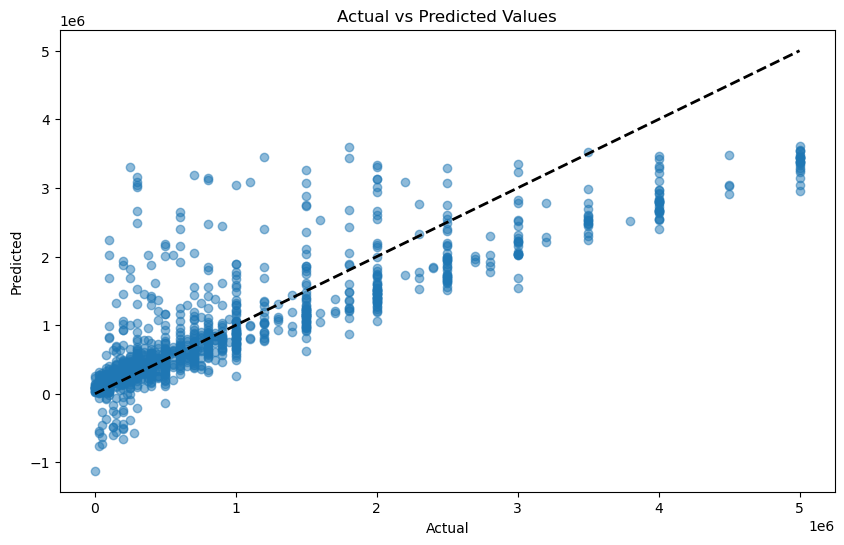

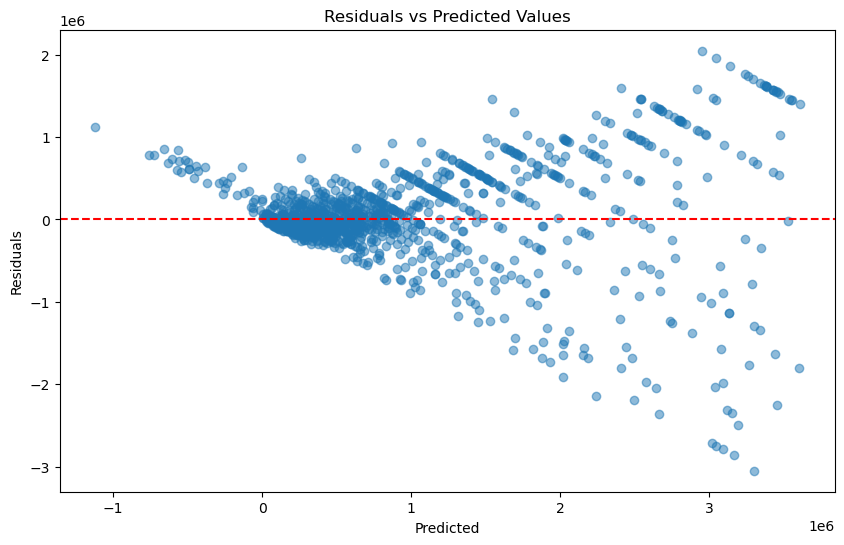

In [76]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Ridge and Lasso Models Training

In [77]:
ridge_model = Ridge()  # You can adjust alpha to see different resu

In [78]:
lasso_model = Lasso()  # You can adjust alpha to see different results

In [79]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [80]:
# Fit GridSearchCV on the training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for ridge model: {'alpha': 5}
Best Parameters for lasso model: {'alpha': 0}


In [81]:
y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

In [82]:
# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge:.2e}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge:.2e}')

# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso:2e}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso:2e}')

Mean Squared Error for training ridge model: 3.09e+11
Mean Squared Error for testing ridge model: 3.47e+11
Mean Squared Error for training lasso model: 3.092318e+11
Mean Squared Error for testing lasso model: 3.466321e+11


In [83]:
# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge:2e}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge:2e}')

# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso:2e}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso:2e}')

Mean Absolute Error for training ridge model: 3.378157e+05
Mean Absolute Error for testing ridge model: 3.619164e+05
Mean Absolute Error for training lasso model: 3.377840e+05
Mean Absolute Error for testing lasso model: 3.618406e+05


In [84]:
# RMSE for Ridge model

print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge)}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge)}')

# RMSE Lasso model

print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso)}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso)}')

Root Mean Squared Error for training ridge model: 556087.8997943527
Root Mean Squared Error for testing ridge model: 588881.1624931449
Root Mean Squared Error for training lasso model: 556086.1101470841
Root Mean Squared Error for testing lasso model: 588754.7388320949


In [85]:
# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training ridge model: 0.7050400382545201
R Square for testing ridge model: 0.7196444174375413
R Square for training lasso model: 0.7050419367797016
R Square for testing lasso model: 0.7197647805152111


# Classification Model

Converting numerical Target to categorical:

In [86]:
# Calculate the 35th and 75th percentiles of the price
p25 = df_t['current_value'].quantile(0.25)
p75 = df_t['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p25:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
df_t['price_category'] = df_t['current_value'].apply(categorize_price)

df_t.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df_t['price_category'].value_counts())

price_category
Good_Price     2964
High_Price     1879
Cheap_Price    1411
Name: count, dtype: int64


In [87]:
p25, p75

(200000.0, 1000000.0)

In [88]:
#df_t = pd.get_dummies(df_t, columns=["price_category"])

In [89]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df_t['price_category_encoded'] = encoder.fit_transform(df_t['price_category']) 
df_t.drop(columns="price_category", inplace=True)

In [90]:
correlation = df_t.corr()
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['price_category_encoded'].sort_values(ascending=False))

price_category_encoded    1.000000
highest_value             0.688033
appearance                0.423326
minutes played            0.400036
assists                   0.263848
yellow cards              0.235002
games_injured             0.202157
age_group_25-29           0.192821
days_injured              0.191456
award                     0.189572
goals                     0.167021
age_group_35-40          -0.127800
position_Other           -0.158291
position_Goalkeeper      -0.162512
Name: price_category_encoded, dtype: float64


In [91]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['price_category_encoded']) > \
threshold]['price_category_encoded'].index
selected_features

Index(['appearance', 'assists', 'yellow cards', 'minutes played',
       'games_injured', 'highest_value', 'price_category_encoded'],
      dtype='object')

In [92]:
# Prepare data
X = df_t.drop(['price_category_encoded'], axis=1)
y = df_t['price_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
X.shape


(6254, 13)

# Buliding the Model


In [94]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

In [95]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [96]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [97]:
# our benchmark model
base_model = round(df_t['price_category_encoded'].value_counts()[1]/df_t.shape[0]*100, 2)
base_model

47.39

In [98]:
# Evaluate the model
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7881694644284573

In [99]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.7955226863881671

In [100]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[230,  47,   1],
       [ 60, 480,  47],
       [  0, 110, 276]], dtype=int64)

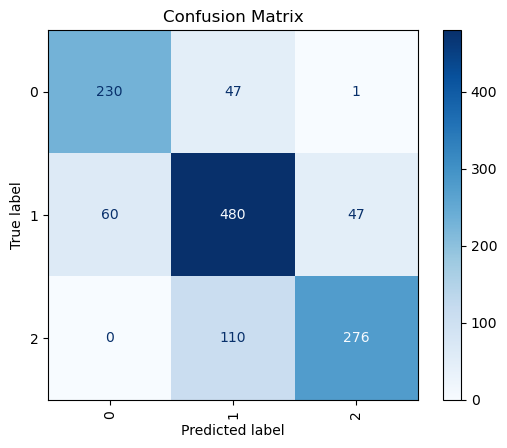

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [102]:
# Calculate Precision
from sklearn.metrics import precision_score


precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.80


In [103]:
# Calculate Recall
from sklearn.metrics import recall_score


recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.79


In [104]:
# Calculate F1 Score
from sklearn.metrics import f1_score


f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.79


# DecisionTreeClassifier

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

In [106]:
param_grid = {
    'max_depth': [4, 5, 6, 7, 8],   # adjust tree depth
    'n_estimators':[35, 40, 50, 60]      # adjust num trees to build before taking the maximum voting or averages of predictions
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

In [107]:
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [108]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [35, 40, 50, 60]},
             scoring='f1_macro', verbose=1)

In [109]:
best_model = grid_search.best_estimator_

In [110]:
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

In [111]:
# Evaluate train set dt model
y_pred_train_dt = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_dt)
accuracy

0.9994003597841296

In [112]:
# Evaluate test set dt model
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.7969624300559552

In [113]:
# Evaluate train set dt model
y_pred_train_rf = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf)
accuracy

0.9992004797121727

In [114]:
# Evaluate test set rf model
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.8553157474020784

In [115]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

0.8780731561063362

In [116]:
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy

0.8593125499600319

# SVM classification

In [117]:
from sklearn.svm import SVC

svm_classifier = SVC() 

param_grid = {
    'kernel': [
             # 'linear',
               'rbf',
             # 'poly'
              ],   # Regularization strength
    'C':[0, 2, 5, 10, 15, 20, 25],
    'gamma': [1,2,6]
}
grid_search = GridSearchCV(estimator=svm_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

In [118]:
grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_

Fitting 5 folds for each of 21 candidates, totalling 105 fits


{'C': 2, 'gamma': 1, 'kernel': 'rbf'}

In [119]:
model = grid_search.best_estimator_

In [120]:
y_pred = model.predict(X_test_scaled)
# our benchmark model
base_model = round(df_t['price_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

47.39

In [121]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7513988808952837

In [122]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.9520287827303617

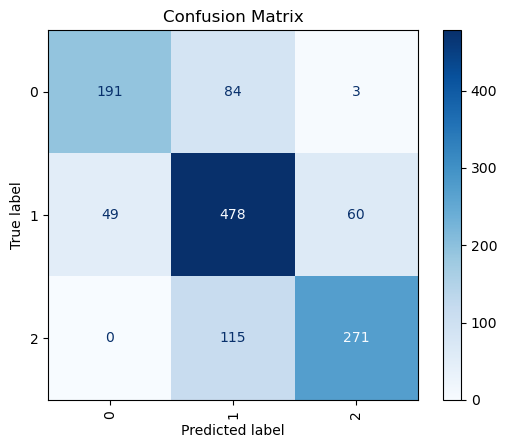

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

# KNN 

In [124]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

In [125]:
grid_search.fit(X_train_scaled, y_train)
model = grid_search.best_estimator_
y_pred = model.predict(X_test_scaled)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [126]:
# Train score
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.7993204077553467

In [127]:
# Test score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7330135891286971

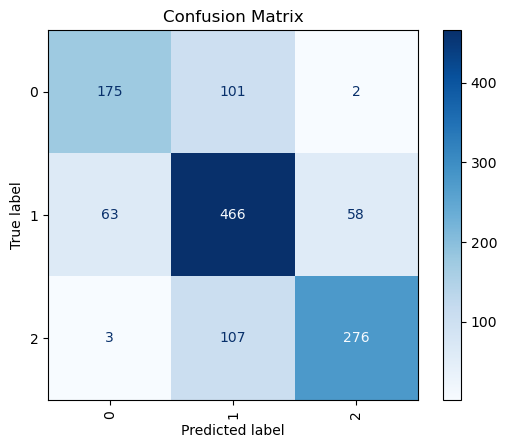

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

# Unsupervised Learning

1. K-Means

In [143]:
df_t.head()

,appearance,goals,assists,yellow cards,minutes played,days_injured,games_injured,award,highest_value,position_Goalkeeper,position_Other,age_group_25-29,age_group_35-40,price_category_encoded
8,34,0.000000,0.000000,0.130529,2758,47,13,0,2000000,False,False,False,False,2
20,39,0.129125,0.064562,0.225968,2788,0,0,1,800000,False,False,False,False,1
21,51,0.153759,0.102506,0.000000,3512,0,0,1,800000,False,False,False,False,1
55,65,0.000000,0.000000,0.015340,5867,0,0,0,2000000,True,False,True,False,2
56,31,0.000000,0.000000,0.064516,2790,89,14,0,3500000,True,False,False,False,1


In [144]:
from sklearn.cluster import KMeans
df_3features = df_t[['minutes played', 'highest_value', 'position_Goalkeeper']]

df_3features.head()

,minutes played,highest_value,position_Goalkeeper
8,2758,2000000,False
20,2788,800000,False
21,3512,800000,False
55,5867,2000000,True
56,2790,3500000,True


In [157]:
# Prepare data
X = df_t


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [158]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

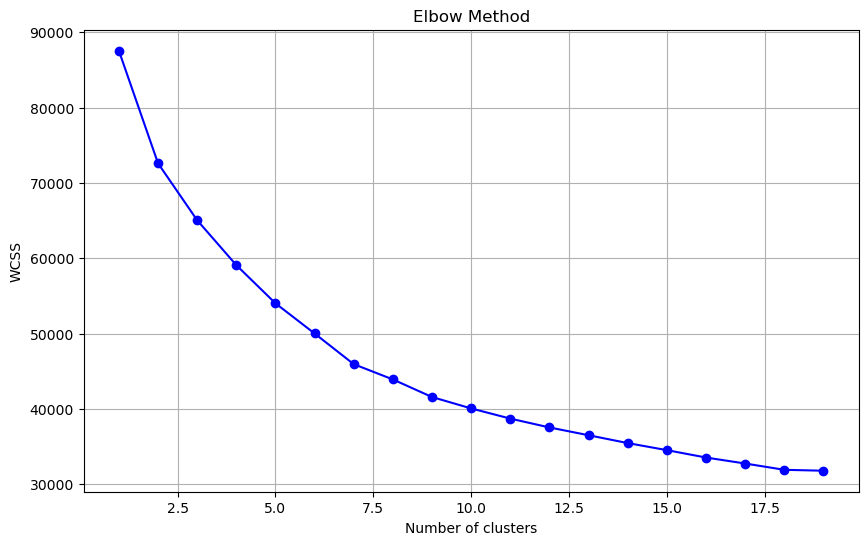

In [159]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [166]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 2 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [167]:
y_pred = model.fit_predict(X_scaled)


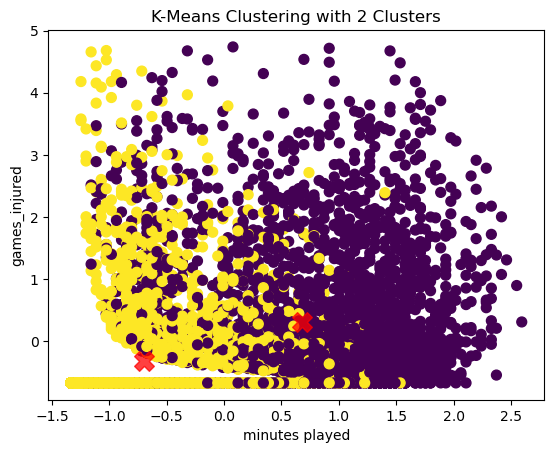

In [168]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('minutes played')
plt.ylabel('games_injured')
plt.show()

In [169]:
X['kmeans'] = y_pred


In [170]:
X['kmeans'].value_counts()


kmeans
0    3179
1    3075
Name: count, dtype: int64

In [172]:
X[X['kmeans']==1]


,appearance,goals,assists,yellow cards,minutes played,days_injured,games_injured,award,highest_value,position_Goalkeeper,position_Other,age_group_25-29,age_group_35-40,price_category_encoded,kmeans
56,31,0.000000,0.000000,0.064516,2790,89,14,0,3500000,True,False,False,False,1,1
84,17,0.000000,0.000000,0.000000,1530,42,10,0,400000,True,False,False,False,1,1
106,60,0.000000,0.000000,0.049180,5490,9,2,1,200000,True,False,False,False,1,1
163,25,0.000000,0.000000,0.040000,2250,158,25,0,1500000,True,False,False,False,2,1
164,23,0.000000,0.000000,0.000000,2070,0,0,0,200000,True,False,False,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10744,32,0.070978,0.000000,0.212934,1268,0,0,0,150000,False,False,False,False,0,1
10748,32,0.226700,0.000000,0.283375,1588,0,0,0,200000,False,False,False,False,1,1
10749,16,0.175953,0.087977,0.263930,1023,0,0,0,75000,False,False,False,False,0,1
10751,20,0.375000,0.000000,0.187500,960,0,0,0,50000,False,False,False,False,0,1


<Axes: xlabel='highest_value', ylabel='minutes played'>

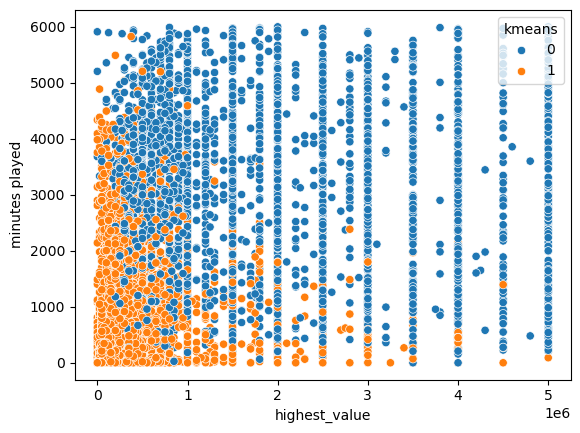

In [173]:
sns.scatterplot(data = X , x = 'highest_value', y = 'minutes played', hue = 'kmeans')


<Axes: xlabel='games_injured', ylabel='highest_value'>

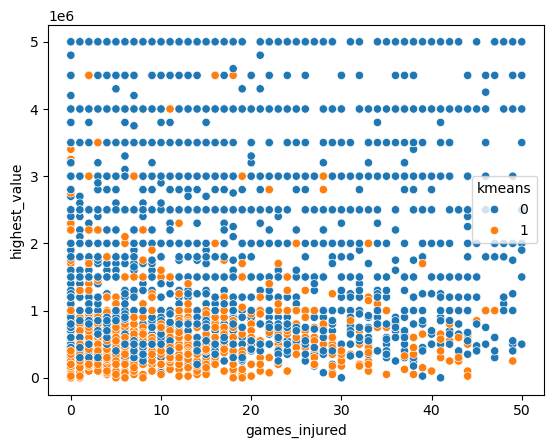

In [175]:
sns.scatterplot(data = X , x = 'games_injured', y = 'highest_value', hue = 'kmeans')


2. DBSCAN

In [178]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


In [176]:
# Prepare data
X = df_t


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [205]:
min_samples = 3
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

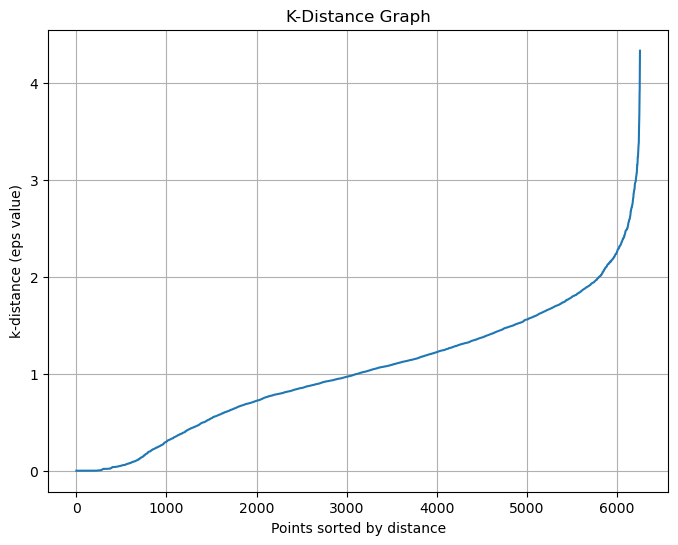

In [206]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [207]:
chosen_eps = 0.1  # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

In [208]:
clusters = dbscan.fit_predict(X_scaled)

In [209]:
pd.Series(clusters).value_counts()


-1     5569
 8      233
 27      98
 2       81
 11      66
 24      32
 1       20
 19      19
 23      12
 32      11
 14       8
 22       7
 17       7
 13       7
 15       6
 9        6
 3        6
 30       6
 6        5
 18       5
 16       4
 28       4
 5        4
 29       4
 10       4
 31       3
 0        3
 26       3
 7        3
 25       3
 4        3
 33       3
 21       3
 12       3
 20       3
Name: count, dtype: int64

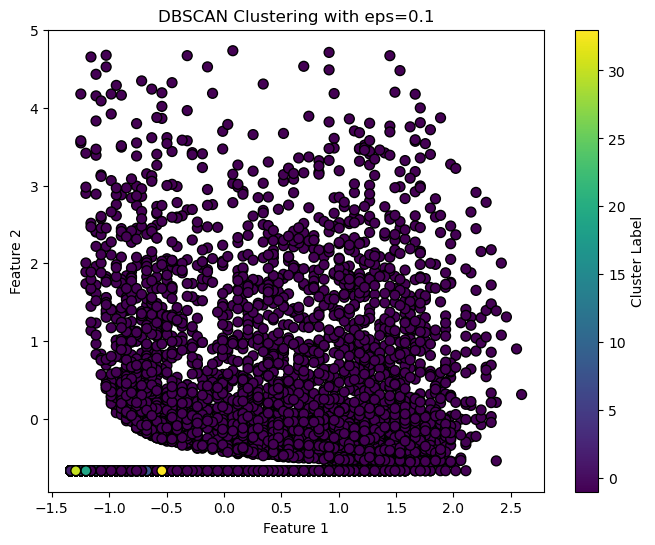

In [210]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()